In [ ]:
Pensemos si el "breadth first search" nos da los mejores resultados para encontrar las trayectorias disjuntas de los Centros de Masa. Ejemplo 01, chequemos si hay puntos consecutivos entre estos dos.

In [6]:
CentrosEx1=readdlm("CentrosMasa/CMPosLapla-1999.dat")
CentrosEx2=readdlm("CentrosMasa/CMPosLapla-2000.dat");

In [7]:
size(CentrosEx2)

(66,3)

In [8]:
CentrosEx1[1,:]

1x3 Array{Float64,2}:
 43.6876  38.7519  110.768

In [9]:
function dist2D(x::Array,y::Array)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

dist2D (generic function with 1 method)

In [10]:
dist2D(CentrosEx1[34,:],CentrosEx2[11,:])

22.135943621178658

In [11]:
TodasLasDist=Array(Float64,(68,66));

In [12]:
for j=1:68,k=1:66
    aux=dist2D(CentrosEx1[j,:],CentrosEx2[k,:])
    aux>0.5 ? TodasLasDist[j,k]=100 : TodasLasDist[j,k]=0
end

In [14]:
using PyPlot

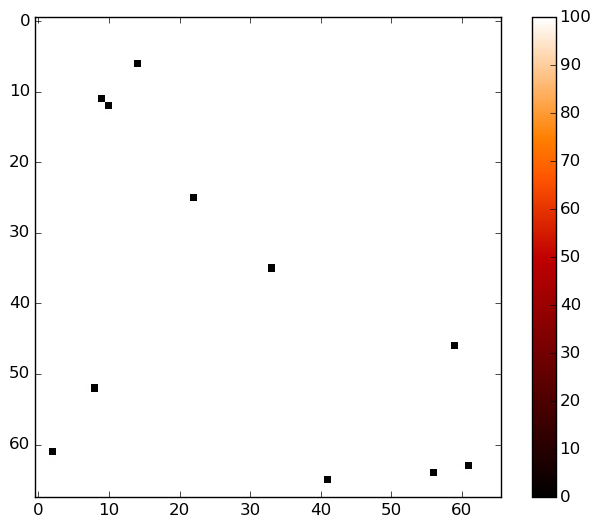

PyObject <matplotlib.colorbar.Colorbar object at 0x7f48e2d21d68>

In [15]:
imagen=imshow(TodasLasDist, interpolation="none", cmap="gist_heat")
cb=colorbar(imagen,fraction=0.046)

In [26]:
UnMegaArray=Array[] 
#=El borrico que toco la flauta por casualidad:
Esto hace un Arrey de Arrays vacio de dimensión uno...
=#

0-element Array{Array{T,N},1}

In [27]:
#tomemos el tiempo
@time for t=1:7000
    CentrosMasa=readdlm("CentrosMasa/CMPosLapla-$t.dat")
    push!(UnMegaArray,CentrosMasa)
end

elapsed time: 1.077805322 seconds (390028928 bytes allocated, 24.52% gc time)


In [29]:
CopiaMegaArray=deepcopy(UnMegaArray);

In [34]:
NumFrames=length(UnMegaArray)
FakeNumFrames=10

10

Tendremos que hacer un Forest Cutting SEARCH!!!


In [89]:
toleradist=sqrt(2)/2
t=1
j=1
TodasCadenas=Set{Array{Float64,1}}()
Cadena=Array[]

0-element Array{Array{T,N},1}

In [90]:
while t <= FakeNumFrames
    
    @label arrrrh
    largura,nada= size(CopiaMegaArray[t])
    
    while j <=largura
        
        if CopiaMegaArray[t][j,3] > 0.01
            #println(CopiaMegaArray[t])
            #comenzamos la cadena
            
            Eslabon=[copy(CopiaMegaArray[t][j,:]), t]
            push!(Cadena, Eslabon)
            mindist=66
            kasterisco=1
            otralargura, nada= size(CopiaMegaArray[t+1])
            huboalgo=false
            
            for k=1:otralargura
                #=
                EslabonTentativo=CopiaMegaArray[t+1][k]
                if(EslabonTentativo[3]>0.01)
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        kasterisko=k
                        huboalgo=true
                    end
                end
            =#
            end    
            
            if huboalgo && mindist<toleradist
               # Eslabon=[copy(CopiaMegaArray[t+1][kasterisco,:]) t+1]
                t+=1
                j=kasterisco
                @goto arrrrh
            end
            
            
        end #cierra sobre el if de  la masa 
                
        j+=1
                    
    end 
    t+=10
end #cierra sobre t

LoadError: mismatch in dimension 2
while loading In[90], in expression starting on line 1

In [91]:
Cadena

0-element Array{Array{T,N},1}

In [54]:
Eslabon

LoadError: Eslabon not defined
while loading In[54], in expression starting on line 1